In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("train.csv")

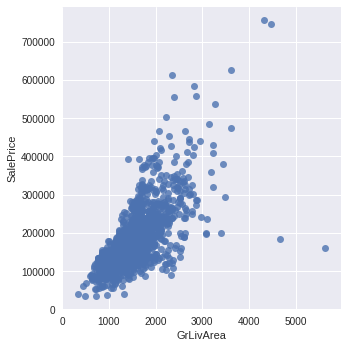

In [4]:
sns.lmplot('GrLivArea', 'SalePrice', data=data, fit_reg=False)
plt.show()

In [113]:
data['Normalized_Area'] = (data['GrLivArea'] - data['GrLivArea'].mean())/data['GrLivArea'].std()

#Grab the relevant data, scale the predictor variable for the gradient descent...
x = data['Normalized_Area']
y = data['SalePrice']

In [114]:
#GRADIENT DESCENT

alpha = 0.001 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with


In [118]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    
    n = x.size
    
    temp_x = x.copy()
    temp_y = y.copy()
    temp_theta = theta.copy()    
    
    ones = np.ones((n,1))
    
    x = x.reshape(n,1)
    x = np.concatenate((ones,x),axis=1)    
    
    y = y.reshape(n,1)
    
    theta = theta.reshape(x.shape[1],1)
        
    print(x.shape,y.shape,theta.shape)
    
    print(np.eye(3) - np.eye(3))

    for i in range(0,iterations):        
        cost = np.dot(np.dot(x,theta).T,np.dot(x,theta))/m
        theta = theta - (np.dot(x.T,np.dot(x,theta)-y))*alpha/m                    
#         compute current cost value
#         compute gradients
#         update theta => thetha = thetha - alpha * gradient
    
    x = temp_x
    y = temp_y
    temp_theta,theta = theta.flatten(),temp_theta
    
    return temp_theta, cost

#Pass the relevant variables to the function and get the new values back...
theta, cost = gradient_descent(x, y, theta, iterations, alpha)

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

(1460, 2) (1460, 1) (2, 1)
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
Gradient Descent: 180474.08, 56155.21


/home/burin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':
/home/burin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


[  12008.46358737   19382.37959117   26756.29559497   34130.21159877
   41504.12760257   48878.04360637   56251.95961016   63625.87561396
   70999.79161776   78373.70762156   85747.62362536   93121.53962916
  100495.45563296  107869.37163675  115243.28764055  122617.20364435
  129991.11964815  137365.03565195  144738.95165575  152112.86765954
  159486.78366334  166860.69966714  174234.61567094  181608.53167474
  188982.44767854  196356.36368234  203730.27968613  211104.19568993
  218478.11169373  225852.02769753  233225.94370133  240599.85970513
  247973.77570893  255347.69171272  262721.60771652  270095.52372032
  277469.43972412  284843.35572792  292217.27173172  299591.18773551
  306965.10373931  314339.01974311  321712.93574691  329086.85175071
  336460.76775451  343834.68375831  351208.5997621   358582.5157659
  365956.4317697   373330.3477735   380704.2637773   388078.1797811
  395452.09578489  402826.01178869  410199.92779249  417573.84379629
  424947.75980009  432321.67580389  

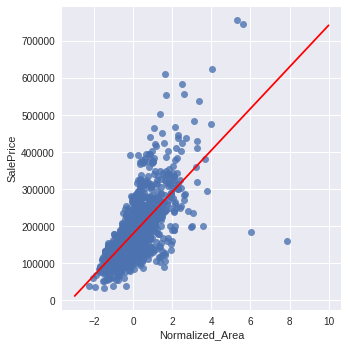

In [119]:
#Plot the regression line obtained from our algorithm
x_line = np.linspace(-3, 10, 100)
y_line = theta[0] + theta[1] * x_line
print(y_line)
sns.lmplot('Normalized_Area', 'SalePrice', data=data, fit_reg=False)
plt.plot(x_line, y_line, 'r')
plt.show()